In [262]:
try :
    # % tensorflow_version only exists in Colab .
    % tensorflow_version 2. x
except Exception :
    pass

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import stockstats
import os
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from lib.rens import rens

In [287]:
def create_dataset(dataset, true_price, look_back = 2):
  
    lookback = look_back
    datax = []
    datay = []
    for i,v in enumerate(dataset):
        if i > lookback:
            datax.append([dataset[i-j] for j in range(lookback, 0, -1)])
            datay.append(true_price[i])    

    datax = np.array(datax)
    datay = np.array(datay)

    sc = preprocessing.StandardScaler()
    datax = sc.fit_transform(datax)
    
    return datax, datay

In [3]:
def make_ready(filer):
    for i, fil in enumerate(filer):
        print(f"{i+1} av {len(filer)} renset" ,end='\r')
        data = cleanup.clean_data(pd.read_excel(fil))
        stock = stockstats.StockDataFrame.retype(data)
        indikatorer = ['rsi_20', 'trix', 'open_8_sma', 'open_16_sma', 'macds', 'open_30_sma']
        for ind in indikatorer:
            stock.get(ind)
        stock['sma8-16'] = [stock.open_8_sma[i] - stock.open_16_sma[i] for i, value in enumerate(stock.open_8_sma)]
        stock['sma30_derivert'] = [stock.open_30_sma[i] / stock.open_30_sma[i-1] if i>1 else 1 
                                   for i, value in enumerate(stock.open_30_sma)]

        #evaluate_trades(stock)
        break # må tas bort ettervært
    
    return stock

    
def add_data(word):
    ordet = 'data/' + word
    return ordet

In [4]:
cleanup = rens()

In [216]:
filer = list(map(add_data, os.listdir('data/')))[5:6] # 60 første er lagd til å bygge modell
data = make_ready(filer)
data

C:\Users\Stian\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values


,tid,open,close,high,low,volume,amount,close_-1_s,close_-1_d,rs_20,rsi_20,trix,open_8_sma,open_16_sma,macd,macds,macdh,open_30_sma,sma8-16,sma30_derivert
0,9:0,159.85,159.85,159.85,159.85,28547,28547,NaN,NaN,NaN,NaN,NaN,159.85000,159.850000,0.000000,0.000000,0.000000,159.850000,0.000000,1.000000
1,9:1,160.00,160.00,160.00,160.00,7714,7714,159.85,0.15,inf,100.000000,0.014913,159.92500,159.925000,0.003365,0.001870,0.001496,159.925000,0.000000,1.000000
2,9:2,160.00,160.00,160.00,160.00,4670,4670,160.00,0.00,inf,100.000000,0.011030,159.95000,159.950000,0.004288,0.002861,0.001427,159.950000,0.000000,1.000156
3,9:3,159.90,159.90,159.90,159.90,1870,1870,160.00,-0.10,1.353750,57.514604,0.006730,159.93750,159.937500,0.000992,0.002228,-0.001236,159.937500,0.000000,0.999922
4,9:4,161.00,161.00,161.00,161.00,1756,1756,159.90,1.10,12.932697,92.822639,0.017917,160.15000,160.150000,0.042952,0.014342,0.028610,160.150000,0.000000,1.001329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,16:16,168.40,168.40,168.40,168.40,10411,10411,167.90,0.50,1.490411,59.845990,0.003370,167.68125,167.740625,0.090262,0.047243,0.043020,167.701667,-0.059375,1.000258
431,16:17,168.60,168.60,168.60,168.60,5654,5654,168.40,0.20,1.619057,61.818313,0.006201,167.79375,167.806250,0.148872,0.067569,0.081304,167.738333,-0.012500,1.000219
432,16:18,168.90,168.90,168.90,168.90,13257,13257,168.60,0.30,1.822181,64.566409,0.010236,167.96250,167.881250,0.217027,0.097460,0.119566,167.790000,0.081250,1.000308
433,16:19,169.20,169.20,169.20,169.20,11841,11841,168.90,0.30,2.035996,67.061878,0.015357,168.21875,167.962500,0.291882,0.136345,0.155538,167.848333,0.256250,1.000348


In [290]:
datax, datay = create_dataset(data.open, data.open, look_back=2)

In [289]:
data.open.head(10)

0    159.85
1    160.00
2    160.00
3    159.90
4    161.00
5    160.60
6    160.00
7    159.80
8    159.90
9    160.50
Name: open, dtype: float64

In [291]:
# reshape input to be [samples, time steps, features]
datax = np.reshape(datax, (datax.shape[0], 1, datax.shape[1]))


In [304]:
lookback

5

In [305]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(input_dim=datax.shape[2], units=512, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=512, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_78 (LSTM)               (None, None, 512)         1054720   
_________________________________________________________________
dropout_61 (Dropout)         (None, None, 512)         0         
_________________________________________________________________
lstm_79 (LSTM)               (None, 512)               2099200   
_________________________________________________________________
dropout_62 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 513       
Total params: 3,154,433
Trainable params: 3,154,433
Non-trainable params: 0
_________________________________________________________________


In [306]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [307]:
model.fit(datax, datay, epochs=300, batch_size=32, validation_split=0.2,
         callbacks= [keras.callbacks.EarlyStopping(
                                    monitor='val_loss', patience=10, restore_best_weights=True)])

Train on 345 samples, validate on 87 samples
Epoch 1/300
345/345 [==============================] - 10s 29ms/sample - loss: 27310.9605 - val_loss: 28128.5258
Epoch 2/300
345/345 [==============================] - 1s 2ms/sample - loss: 27141.4219 - val_loss: 28195.0458
Epoch 3/300
345/345 [==============================] - 1s 2ms/sample - loss: 26609.4337 - val_loss: 28336.1974
Epoch 4/300
345/345 [==============================] - 1s 2ms/sample - loss: 25476.9375 - val_loss: 28514.5354
Epoch 5/300
345/345 [==============================] - 1s 2ms/sample - loss: 24017.2834 - val_loss: 28513.7118
Epoch 6/300
345/345 [==============================] - 1s 2ms/sample - loss: 22393.1350 - val_loss: 27681.2955
Epoch 7/300
345/345 [==============================] - 1s 2ms/sample - loss: 20138.8811 - val_loss: 24310.6784
Epoch 8/300
345/345 [==============================] - 1s 2ms/sample - loss: 16502.0672 - val_loss: 17711.5884
Epoch 9/300
345/345 [==============================] - 1s 2ms/sam

345/345 [==============================] - 1s 2ms/sample - loss: 16.6468 - val_loss: 4.5678
Epoch 77/300
345/345 [==============================] - 1s 2ms/sample - loss: 19.2520 - val_loss: 4.4136
Epoch 78/300
345/345 [==============================] - 1s 2ms/sample - loss: 14.5266 - val_loss: 4.2206
Epoch 79/300
345/345 [==============================] - 1s 2ms/sample - loss: 14.2195 - val_loss: 3.9994
Epoch 80/300
345/345 [==============================] - 1s 2ms/sample - loss: 15.1512 - val_loss: 3.7220
Epoch 81/300
345/345 [==============================] - 1s 2ms/sample - loss: 13.8089 - val_loss: 3.4867
Epoch 82/300
345/345 [==============================] - 1s 2ms/sample - loss: 14.2829 - val_loss: 3.2698
Epoch 83/300
345/345 [==============================] - 1s 2ms/sample - loss: 13.6012 - val_loss: 3.1146
Epoch 84/300
345/345 [==============================] - 1s 2ms/sample - loss: 14.7503 - val_loss: 2.9849
Epoch 85/300
345/345 [==============================] - 1s 2ms/sampl

In [282]:
predict = model.predict(datax)

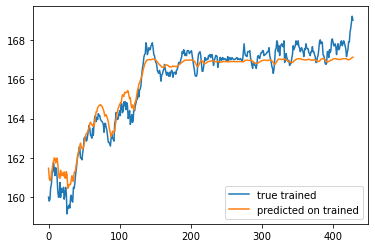

In [283]:
plt.plot(datay, label='true trained')
plt.plot(predict, label='predicted on trained')
plt.legend()
plt.show()

In [250]:
predict

array([[165.00851],
       [165.00731],
       [165.00694],
       [165.00829],
       [165.01036],
       [165.01021],
       [165.00734],
       [165.00264],
       [164.99654],
       [164.9915 ],
       [164.98875],
       [164.98805],
       [164.98843],
       [164.99098],
       [164.99413],
       [164.99861],
       [165.00429],
       [165.0076 ],
       [165.00902],
       [165.00874],
       [165.00772],
       [165.00786],
       [165.00813],
       [165.00807],
       [165.00896],
       [165.00887],
       [165.00906],
       [165.01016],
       [165.01146],
       [165.0132 ],
       [165.01521],
       [165.01567],
       [165.015  ],
       [165.01402],
       [165.0131 ],
       [165.0124 ],
       [165.01141],
       [165.01067],
       [165.00911],
       [165.00563],
       [165.00136],
       [164.99638],
       [164.9887 ],
       [164.9803 ],
       [164.9705 ],
       [164.96178],
       [164.9583 ],
       [164.95877],
       [164.96251],
       [164.96652],
